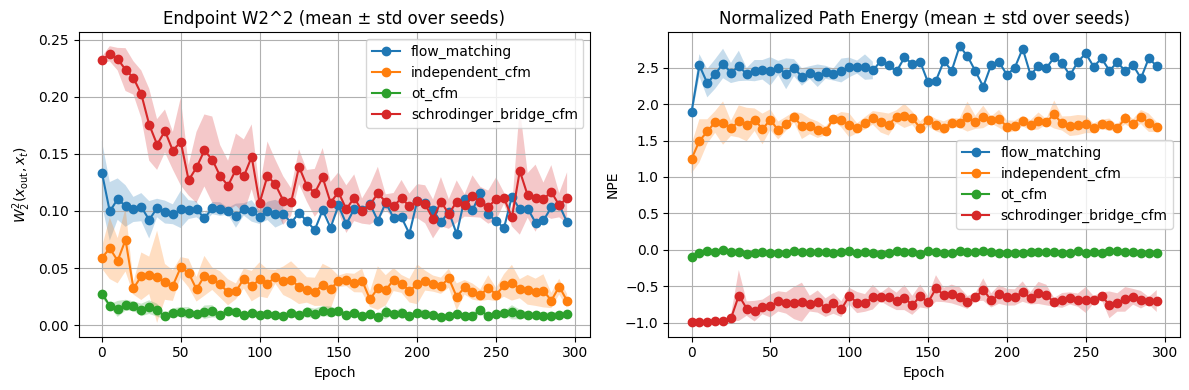

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "./run/results/metrics_moons_6gaussians.csv"

df = pd.read_csv(CSV_PATH)

df["epoch"] = pd.to_numeric(df["epoch"])
df["seed"] = pd.to_numeric(df["seed"])

agg = (
    df.groupby(["method", "epoch"])
      .agg(
          w22_mean=("w22_xout_xt", "mean"),
          w22_std=("w22_xout_xt", "std"),
          npe_mean=("npe", "mean"),
          npe_std=("npe", "std"),
      )
      .reset_index()
)
agg = agg[agg["epoch"] <= 300]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

for method, g in agg.groupby("method"):
    g = g.sort_values("epoch")

    plt.plot(
        g["epoch"],
        g["w22_mean"],
        marker="o",
        label=method,
    )

    plt.fill_between(
        g["epoch"],
        g["w22_mean"] - g["w22_std"],
        g["w22_mean"] + g["w22_std"],
        alpha=0.25,
    )

plt.xlabel("Epoch")
plt.ylabel(r"$W_2^2(x_{\mathrm{out}}, x_t)$")
plt.title("Endpoint W2^2 (mean ± std over seeds)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)

for method, g in agg.groupby("method"):
    g = g.sort_values("epoch")

    plt.plot(
        g["epoch"],
        g["npe_mean"],
        marker="o",
        label=method,
    )

    plt.fill_between(
        g["epoch"],
        g["npe_mean"] - g["npe_std"],
        g["npe_mean"] + g["npe_std"],
        alpha=0.25,
    )

plt.xlabel("Epoch")
plt.ylabel("NPE")
plt.title("Normalized Path Energy (mean ± std over seeds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()